# Neural Network 간단히 둘러보기 2
- Fashion MNIST 예제

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


## 1. 패션 MNIST 데이터셋 임포트하기
- Fashion MNIST Dataset은 다음과 같은 Dataset임<br>
$ \ \ $ $\checkmark \ $ keras에서 바로 import할 수 있음<br>
$ \ \ $ $\checkmark \ $ 10개의 범주(category)<br>
$ \ \ $ $\checkmark \ $ 70,000개의 $28 \times 28 \ $Gray

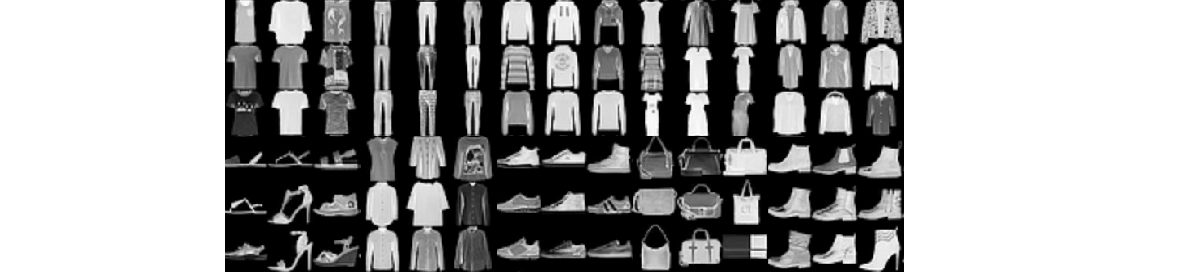

- Image는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냄 <br>
\- Fashion MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됨<br>
\- Fashion MNIST 사용하려는 Image와 동일한 Format임<br>
\- Fashion MNISTT는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했음<br>
\- MNIST와 Fashion MNIST 2개의 Dataset은 비교적 작기 때문에 Neural Network의 작동 여부를 확인하기 위해 사용됨<br>
\- Neural Network를 훈련하는데 60,000개의 Image를 사용<br>
\- 60,000개의 Training Datset을 이용하여 학습된 Neural Network가 얼마나 정확하게 Image를 분류하는지 10,000개의 Image로 평가함

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- load_data() 함수를 호출하면 네 개의 numpy 배열이 반환됨<br>
\- train_images와 train_labels 배열은 모델 학습에 사용되는 training dataset임<br>
\- test_images와 test_labels 배열은 모델 테스트에 사용되는 test dataset임<br>
- 이미지는 28x28 크기의 numpy 배열이고 픽셀 값은 0과 255 사이의 값을 가짐<br>
- Label은 0에서 9까지의 정수 배열임<br>
\- 9개의 정수 값은 각 image의 class를 나타냄

레이블	| 클래스
:----: | :----
0	| T-shirt/top
1	| Trouser
2	| Pullover
3	| Dress
4	| Coat
5	| Sandal
6	| Shirt
7	| Sneaker
8	| Bag
9	| Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Fashion MNIST Data 탐색

- Neural Network Model을 훈련하기 전에 Fashion MNIST Dataset 구조를 살펴봄
- 다음 code는 training dataset에 60,000개의 image가 있다는 것임
- 각 이미지는 28x28 pixel로 표현됨

In [4]:
train_images.shape

(60000, 28, 28)

- Training dataset에는 60,000개의 label이 있음

In [5]:
len(train_labels)

60000

- 각 label은 0과 9사이의 정수

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- Test Dataset에는 10,000개의 이미지가 있음
- 이 image도 28x28 pixel로 표현됨

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 3. Data 전처리
- Deep Neural Network의 훈련 성과를 높이기 위해 data를 전처리(preprocessing)함
- Training dataset에 있는 첫 번째 image를 보면 pixel 값의 범위가 0~255 사이라는 것을 알 수 있음

In [73]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

- Training dataset의 첫번째 image를 출력해 봄

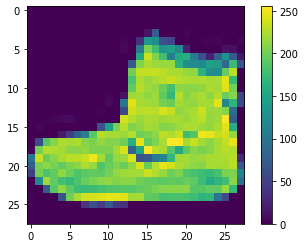

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- image를 구성하고 있는 [0, 255] 사이의 정수 값을 [0, 1] 사이의 부동소숫점 값으로 전처리함 

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- Training dataset의 처음 25개 image들을 출력해 봄

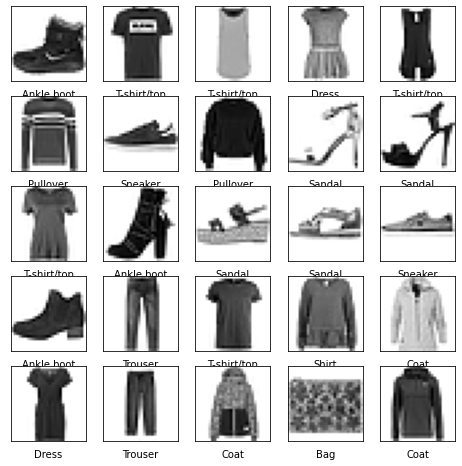

In [11]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

- Deep Neural Network의 Architecture를 설계함<br>
$ \ \ $ $\checkmark \ $ input layer: $28 \times 28$ image <br>
$ \ \ $ $\checkmark \ $ 첫번째 layer: 128개 node <br>
$ \ \ $ $\checkmark \ $ output layer: 10개 node <br>

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.5004 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.3766 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.3378 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3113 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2950 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.2792 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.2682 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2461 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3444 - accuracy: 0.8808 - 375ms/epoch - 1ms/step

테스트 정확도: 0.8808000087738037


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 669us/step


In [17]:
predictions[0]

array([1.95669152e-08, 1.63630720e-10, 3.49961837e-10, 6.02650777e-11,
       2.91214377e-08, 6.28243142e-04, 1.33340885e-08, 1.91519957e-03,
       1.35582479e-06, 9.97455180e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [21]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

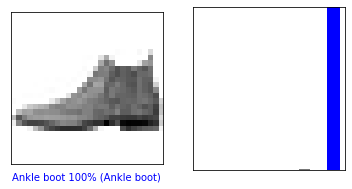

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

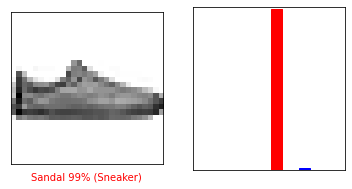

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

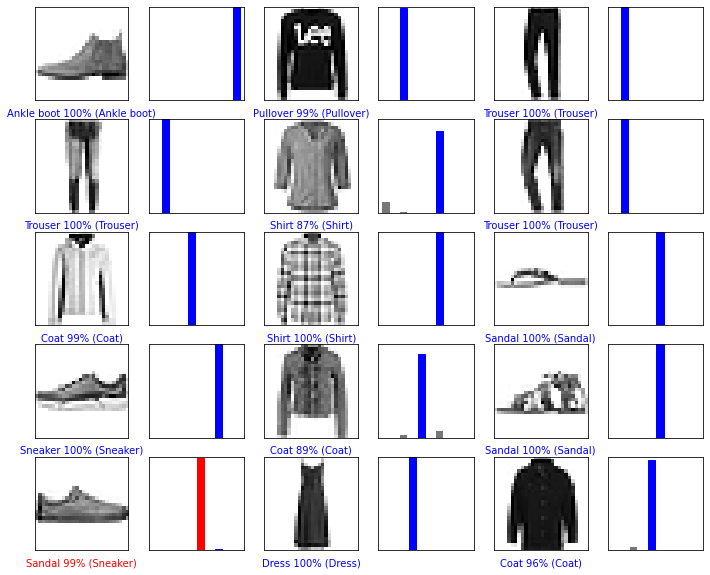

In [24]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [26]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.95668779e-08 1.63629790e-10 3.49960477e-10 6.02651887e-11
  2.91214928e-08 6.28243783e-04 1.33340885e-08 1.91519863e-03
  1.35582218e-06 9.97455180e-01]]


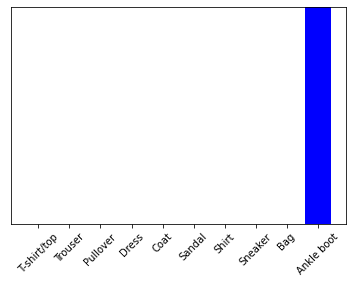

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

9